In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    plt.savefig(datetime.now().strftime("%Y/%m/%d %H:%M:%S") + ".pdf")
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)


['inputs', 'targets']
['inputs', 'targets']


In [4]:
from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

PrintLayer fprop: (100, 1, 28, 28)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 24, 24)
PrintLayer fprop: (100, 5, 12, 12)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 10, 8, 8)
PrintLayer fprop: (100, 10, 4, 4)
PrintLayer fprop: (100, 160)
PrintLayer fprop: (100, 47)


A Jupyter Widget

A Jupyter Widget

PrintLayer bprop: (100, 47)
PrintLayer param: (100, 47)
PrintLayer bprop: (100, 160)
PrintLayer param: (100, 160)
PrintLayer bprop: (100, 10, 4, 4)
PrintLayer param: (100, 10, 4, 4)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 10, 8, 8)
PrintLayer param: (100, 10, 8, 8)
PrintLayer bprop: (100, 5, 12, 12)
PrintLayer param: (100, 5, 12, 12)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 5, 24, 24)
PrintLayer param: (100, 5, 24, 24)
PrintLayer bprop: (100, 1, 28, 28)
PrintLayer param: (100, 1, 28, 28)


Epoch 1: 1318.9s to complete
    error(train)=3.85e+00, acc(train)=3.40e-02, error(valid)=3.85e+00, acc(valid)=3.35e-02


A Jupyter Widget

Epoch 2: 1303.2s to complete
    error(train)=3.85e+00, acc(train)=3.24e-02, error(valid)=3.85e+00, acc(valid)=3.23e-02


A Jupyter Widget

Epoch 3: 1302.6s to complete
    error(train)=3.85e+00, acc(train)=3.32e-02, error(valid)=3.85e+00, acc(valid)=3.28e-02


A Jupyter Widget

Epoch 4: 1303.6s to complete
    error(train)=3.85e+00, acc(train)=3.30e-02, error(valid)=3.85e+00, acc(valid)=3.30e-02


A Jupyter Widget

Epoch 5: 1332.8s to complete
    error(train)=3.85e+00, acc(train)=3.37e-02, error(valid)=3.85e+00, acc(valid)=3.47e-02


A Jupyter Widget

Epoch 6: 1328.9s to complete
    error(train)=3.84e+00, acc(train)=3.44e-02, error(valid)=3.85e+00, acc(valid)=3.41e-02


A Jupyter Widget

Epoch 7: 1422.0s to complete
    error(train)=3.84e+00, acc(train)=3.49e-02, error(valid)=3.84e+00, acc(valid)=3.50e-02


A Jupyter Widget

Epoch 8: 1322.4s to complete
    error(train)=3.83e+00, acc(train)=3.60e-02, error(valid)=3.83e+00, acc(valid)=3.63e-02


A Jupyter Widget

Epoch 9: 1240.2s to complete
    error(train)=3.82e+00, acc(train)=3.92e-02, error(valid)=3.82e+00, acc(valid)=4.00e-02


A Jupyter Widget

Epoch 10: 1074.7s to complete
    error(train)=3.79e+00, acc(train)=4.42e-02, error(valid)=3.79e+00, acc(valid)=4.50e-02


A Jupyter Widget

Epoch 11: 1082.4s to complete
    error(train)=3.75e+00, acc(train)=5.76e-02, error(valid)=3.75e+00, acc(valid)=5.56e-02


A Jupyter Widget

Epoch 12: 1078.4s to complete
    error(train)=3.65e+00, acc(train)=8.77e-02, error(valid)=3.66e+00, acc(valid)=8.20e-02


A Jupyter Widget

Epoch 13: 1074.9s to complete
    error(train)=3.43e+00, acc(train)=1.48e-01, error(valid)=3.43e+00, acc(valid)=1.44e-01


A Jupyter Widget

Epoch 14: 1082.3s to complete
    error(train)=2.93e+00, acc(train)=2.32e-01, error(valid)=2.93e+00, acc(valid)=2.28e-01


A Jupyter Widget

Epoch 15: 1076.0s to complete
    error(train)=2.37e+00, acc(train)=3.61e-01, error(valid)=2.37e+00, acc(valid)=3.60e-01


A Jupyter Widget

Epoch 16: 1077.2s to complete
    error(train)=1.96e+00, acc(train)=4.62e-01, error(valid)=1.96e+00, acc(valid)=4.65e-01


A Jupyter Widget

Epoch 17: 1074.3s to complete
    error(train)=1.73e+00, acc(train)=5.20e-01, error(valid)=1.72e+00, acc(valid)=5.22e-01


A Jupyter Widget

Epoch 18: 1081.0s to complete
    error(train)=1.59e+00, acc(train)=5.57e-01, error(valid)=1.57e+00, acc(valid)=5.55e-01


A Jupyter Widget

Epoch 19: 1076.1s to complete
    error(train)=1.49e+00, acc(train)=5.80e-01, error(valid)=1.48e+00, acc(valid)=5.82e-01


A Jupyter Widget

Epoch 20: 1071.7s to complete
    error(train)=1.42e+00, acc(train)=5.98e-01, error(valid)=1.40e+00, acc(valid)=5.98e-01


A Jupyter Widget

Epoch 21: 1077.0s to complete
    error(train)=1.37e+00, acc(train)=6.12e-01, error(valid)=1.35e+00, acc(valid)=6.13e-01


A Jupyter Widget

Epoch 22: 1082.5s to complete
    error(train)=1.32e+00, acc(train)=6.22e-01, error(valid)=1.31e+00, acc(valid)=6.25e-01


A Jupyter Widget

Epoch 23: 680.1s to complete
    error(train)=1.28e+00, acc(train)=6.32e-01, error(valid)=1.27e+00, acc(valid)=6.35e-01


A Jupyter Widget

Epoch 24: 680.6s to complete
    error(train)=1.25e+00, acc(train)=6.42e-01, error(valid)=1.23e+00, acc(valid)=6.45e-01


A Jupyter Widget

Epoch 25: 716.6s to complete
    error(train)=1.21e+00, acc(train)=6.49e-01, error(valid)=1.20e+00, acc(valid)=6.55e-01


A Jupyter Widget

Epoch 26: 682.9s to complete
    error(train)=1.19e+00, acc(train)=6.58e-01, error(valid)=1.18e+00, acc(valid)=6.60e-01


A Jupyter Widget

Epoch 27: 683.0s to complete
    error(train)=1.16e+00, acc(train)=6.65e-01, error(valid)=1.15e+00, acc(valid)=6.68e-01


A Jupyter Widget

Epoch 28: 702.6s to complete
    error(train)=1.14e+00, acc(train)=6.70e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


A Jupyter Widget

Epoch 29: 1422.2s to complete
    error(train)=1.11e+00, acc(train)=6.76e-01, error(valid)=1.10e+00, acc(valid)=6.81e-01


A Jupyter Widget

Epoch 30: 1227.7s to complete
    error(train)=1.10e+00, acc(train)=6.78e-01, error(valid)=1.08e+00, acc(valid)=6.83e-01


A Jupyter Widget

Epoch 31: 1249.6s to complete
    error(train)=1.08e+00, acc(train)=6.85e-01, error(valid)=1.07e+00, acc(valid)=6.91e-01


A Jupyter Widget

Epoch 32: 1219.8s to complete
    error(train)=1.06e+00, acc(train)=6.90e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


A Jupyter Widget

Epoch 33: 1214.9s to complete
    error(train)=1.04e+00, acc(train)=6.93e-01, error(valid)=1.03e+00, acc(valid)=6.97e-01


A Jupyter Widget

Epoch 34: 1531.1s to complete
    error(train)=1.03e+00, acc(train)=6.98e-01, error(valid)=1.02e+00, acc(valid)=7.02e-01


A Jupyter Widget

Epoch 35: 2287.0s to complete
    error(train)=1.01e+00, acc(train)=7.01e-01, error(valid)=1.00e+00, acc(valid)=7.05e-01


A Jupyter Widget

Epoch 36: 1221.7s to complete
    error(train)=1.00e+00, acc(train)=7.05e-01, error(valid)=9.93e-01, acc(valid)=7.07e-01


A Jupyter Widget

Epoch 37: 1217.8s to complete
    error(train)=9.84e-01, acc(train)=7.10e-01, error(valid)=9.76e-01, acc(valid)=7.13e-01


A Jupyter Widget

Epoch 38: 1216.9s to complete
    error(train)=9.70e-01, acc(train)=7.13e-01, error(valid)=9.60e-01, acc(valid)=7.18e-01


A Jupyter Widget

Epoch 39: 1211.0s to complete
    error(train)=9.58e-01, acc(train)=7.17e-01, error(valid)=9.50e-01, acc(valid)=7.20e-01


A Jupyter Widget

Epoch 40: 1086.4s to complete
    error(train)=9.45e-01, acc(train)=7.20e-01, error(valid)=9.38e-01, acc(valid)=7.21e-01


A Jupyter Widget

Epoch 41: 1288.3s to complete
    error(train)=9.37e-01, acc(train)=7.22e-01, error(valid)=9.31e-01, acc(valid)=7.24e-01


A Jupyter Widget

Epoch 42: 1236.5s to complete
    error(train)=9.28e-01, acc(train)=7.24e-01, error(valid)=9.23e-01, acc(valid)=7.26e-01


A Jupyter Widget

Epoch 43: 1245.6s to complete
    error(train)=9.18e-01, acc(train)=7.24e-01, error(valid)=9.13e-01, acc(valid)=7.27e-01


A Jupyter Widget

Epoch 44: 1020.1s to complete
    error(train)=9.03e-01, acc(train)=7.32e-01, error(valid)=8.96e-01, acc(valid)=7.35e-01


A Jupyter Widget

Epoch 45: 1686.9s to complete
    error(train)=8.95e-01, acc(train)=7.34e-01, error(valid)=8.90e-01, acc(valid)=7.38e-01


A Jupyter Widget

Epoch 46: 1286.4s to complete
    error(train)=8.89e-01, acc(train)=7.34e-01, error(valid)=8.84e-01, acc(valid)=7.39e-01


A Jupyter Widget

Epoch 47: 986.6s to complete
    error(train)=8.78e-01, acc(train)=7.38e-01, error(valid)=8.72e-01, acc(valid)=7.43e-01


A Jupyter Widget

Epoch 48: 957.2s to complete
    error(train)=8.71e-01, acc(train)=7.39e-01, error(valid)=8.65e-01, acc(valid)=7.44e-01


A Jupyter Widget

Epoch 49: 950.8s to complete
    error(train)=8.60e-01, acc(train)=7.42e-01, error(valid)=8.54e-01, acc(valid)=7.45e-01


A Jupyter Widget

Epoch 50: 964.7s to complete
    error(train)=8.52e-01, acc(train)=7.43e-01, error(valid)=8.47e-01, acc(valid)=7.45e-01


FileNotFoundError: [Errno 2] No such file or directory: '2017/12/03 19:52:12.pdf'

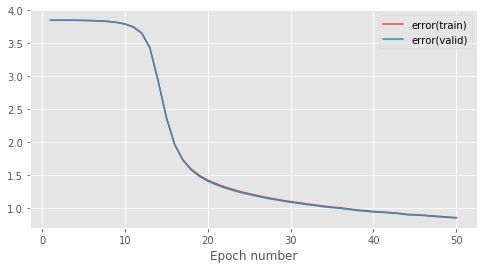

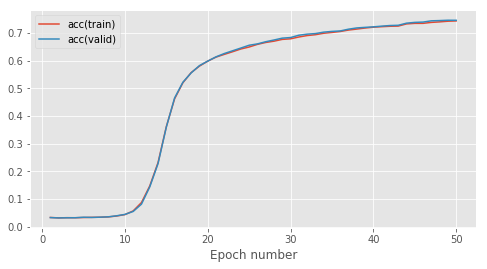

In [5]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
kernel_dim = 5

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer((1,28,28,)) , #(1, 28, 28)
    PrintLayer(),
    ConvolutionalLayer(1, 5, 28, 28, 5, 5) , # (5, 24, 24)
    PrintLayer(),
    ReluLayer(), # (5, 24, 24)
    PrintLayer(),
    MaxPoolingLayer() ,  # (5, 12, 12)
    PrintLayer(),
    ConvolutionalLayer(5,10,12,12,5,5), # (10, 8, 8)
    PrintLayer(),
    ReluLayer(), # (10, 8, 8)
    PrintLayer(),
    MaxPoolingLayer(), # (10, 4, 4)
    PrintLayer(),
    ReshapeLayer((10*4*4,)), # (160)
    PrintLayer(),
    AffineLayer(10*4*4, output_dim, weights_init, biases_init), # 47
    PrintLayer()
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)


#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

-1